In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chips-customer-analysis-plan-forage/QVI_purchase_behaviour.csv
/kaggle/input/chips-customer-analysis-plan-forage/QVI_transaction_data.csv


In [2]:
# Load datasets

#filePath = "/kaggle/input/forage-chips-customer-analysis-plan/"
#transactionData = pd.read_csv(f"{filePath}QVI_transaction_data.csv")
#customerData = pd.read_csv(f"{filePath}QVI_purchase_behaviour.csv")

transactionData = pd.read_csv('/kaggle/input/chips-customer-analysis-plan-forage/QVI_transaction_data.csv')
customerData = pd.read_csv('/kaggle/input/chips-customer-analysis-plan-forage/QVI_purchase_behaviour.csv')


In [3]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
# Display the first few rows of each dataset
transaction_data_head = transactionData.head()
customer_data_head = customerData.head()

transaction_data_shape = transactionData.shape
customer_data_shape = customerData.shape

transaction_data_head, customer_data_head, transaction_data_shape, customer_data_shape

(    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 0  43390          1            1000       1         5   
 1  43599          1            1307     348        66   
 2  43605          1            1343     383        61   
 3  43329          2            2373     974        69   
 4  43330          2            2426    1038       108   
 
                                   PROD_NAME  PROD_QTY  TOT_SALES  
 0    Natural Chip        Compny SeaSalt175g         2        6.0  
 1                  CCs Nacho Cheese    175g         3        6.3  
 2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
 3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
 4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  ,
    LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
 0            1000   YOUNG SINGLES/COUPLES          Premium
 1            1002   YOUNG SINGLES/COUPLES       Mainstream
 2            1003          YOUNG FAMILIES           Budget
 

In [6]:
# Check for missing values in both datasets
missing_transaction_data = transactionData.isnull().sum()
missing_customer_data = customerData.isnull().sum()

missing_transaction_data, missing_customer_data


(DATE              0
 STORE_NBR         0
 LYLTY_CARD_NBR    0
 TXN_ID            0
 PROD_NBR          0
 PROD_NAME         0
 PROD_QTY          0
 TOT_SALES         0
 dtype: int64,
 LYLTY_CARD_NBR      0
 LIFESTAGE           0
 PREMIUM_CUSTOMER    0
 dtype: int64)

In [7]:
# Check for duplicate rows
duplicate_transaction_data = transactionData.duplicated().sum()
duplicate_customer_data = customerData.duplicated().sum()

duplicate_transaction_data, duplicate_customer_data

(1, 0)

In [8]:
# There is one duplicate value in transactionData dataset, and no value in customerData 
duplicate_rows = transactionData.duplicated() 
duplicate_data = transactionData[duplicate_rows] 
duplicate_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [9]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [10]:
transaction_data_clean = transactionData.drop_duplicates()
transaction_data_clean

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [11]:
transaction_data_clean.shape

(264835, 8)

In [12]:
# Quick statistics of numeric columns to inspect outliers
transaction_data_clean.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
# removing outlier/s from PROD_QTY column(200)
# Considering transactions where quantity > 10 as outliers
outlier_qty_transactions = transaction_data_clean[transaction_data_clean['PROD_QTY'] > 10]
outlier_qty_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [14]:
# Remove the outliers
transaction_data_clean = transaction_data_clean[transaction_data_clean['PROD_QTY'] <= 10]
transaction_data_clean

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [15]:
# Checking the shape after cleaning
cleaned_transaction_data_shape = transaction_data_clean.shape
cleaned_transaction_data_shape

(264833, 8)

In [16]:
# Quick statistics of numeric columns to inspect outliers
customerData.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


We conclude that there exists no outliers in customerData file

# Extra Features

In [17]:
# Extractng pack size and brand name from PROD_NAME column
import re

# Function to extract pack size from PROD_NAME column ('175g')
def extract_pack_size(prod_name):
    match = re.search(r'(\d+)(g)', prod_name.lower())
    return int(match.group(1)) if match else None

# Function to extract brand name from PROD_NAME column
def extract_brand_name(prod_name):
    return prod_name.split()[0]

# Functions to derive pack size and brand name
transaction_data_clean['PACK_SIZE'] = transaction_data_clean['PROD_NAME'].apply(extract_pack_size)
transaction_data_clean['BRAND'] = transaction_data_clean['PROD_NAME'].apply(extract_brand_name)

# Checking the first few rows to verify
transaction_data_clean[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head()

/tmp/ipykernel_18/4161293363.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_clean['PACK_SIZE'] = transaction_data_clean['PROD_NAME'].apply(extract_pack_size)
/tmp/ipykernel_18/4161293363.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_clean['BRAND'] = transaction_data_clean['PROD_NAME'].apply(extract_brand_name)


,PROD_NAME,PACK_SIZE,BRAND
0,Natural Chip Compny SeaSalt175g,175,Natural
1,CCs Nacho Cheese 175g,175,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,175,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,Kettle


In [18]:
# Merging the datasets on 'LYLTY_CARD_NBR'
merged_data = pd.merge(transaction_data_clean, customerData, on='LYLTY_CARD_NBR')
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


                 LIFESTAGE PREMIUM_CUSTOMER  total_sales  num_transactions
6           OLDER FAMILIES           Budget    168363.25             23160
19   YOUNG SINGLES/COUPLES       Mainstream    157621.60             20854
13                RETIREES       Mainstream    155677.05             21466
15          YOUNG FAMILIES           Budget    139345.85             19122
9    OLDER SINGLES/COUPLES           Budget    136769.80             18407
10   OLDER SINGLES/COUPLES       Mainstream    133393.80             18318
11   OLDER SINGLES/COUPLES          Premium    132257.15             17753
12                RETIREES           Budget    113147.80             15201
7           OLDER FAMILIES       Mainstream    103445.55             14244
14                RETIREES          Premium     97646.05             13096
16          YOUNG FAMILIES       Mainstream     92788.75             12907
1   MIDAGE SINGLES/COUPLES       Mainstream     90803.85             11874
17          YOUNG FAMILIE

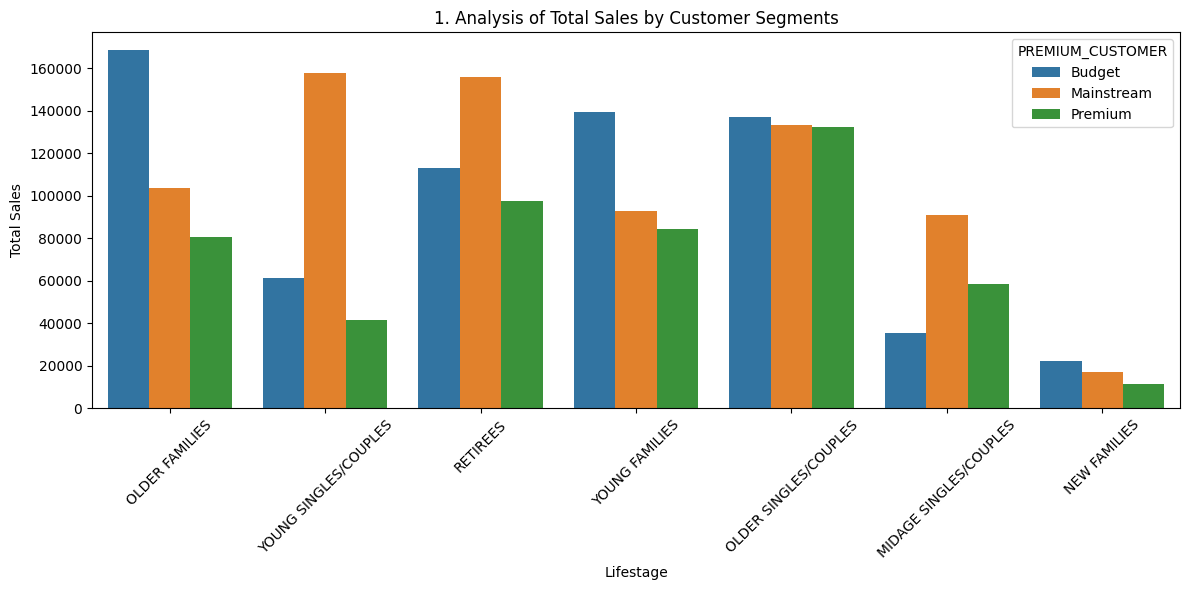

In [19]:
# Analysis on customer segments and purchasing behavior
# Grouping data by LIFESTAGE and PREMIUM_CUSTOMER to calculate total sales, pack sizes, and transaction frequency.
    # 1. Analysis of Total Sales by Customer Segments
    # 2. Average spend per transaction
    # 3. Pack Size Analysis
    # 4. Brand Preferences

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    num_transactions=('TXN_ID', 'count')
).reset_index()

# Sort by total sales for better visualization
sales_by_segment = sales_by_segment.sort_values('total_sales', ascending=False)

# Display the result
print(sales_by_segment)

# Bar plot for total sales by customer segments
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='total_sales', hue='PREMIUM_CUSTOMER', data=sales_by_segment)
plt.title('1. Analysis of Total Sales by Customer Segments')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Lifestage')
plt.tight_layout()
plt.show()

                 LIFESTAGE PREMIUM_CUSTOMER  avg_spend
0   MIDAGE SINGLES/COUPLES           Budget   7.074661
1   MIDAGE SINGLES/COUPLES       Mainstream   7.647284
2   MIDAGE SINGLES/COUPLES          Premium   7.112056
3             NEW FAMILIES           Budget   7.297321
4             NEW FAMILIES       Mainstream   7.317806
5             NEW FAMILIES          Premium   7.231655
6           OLDER FAMILIES           Budget   7.269570
7           OLDER FAMILIES       Mainstream   7.262395
8           OLDER FAMILIES          Premium   7.208079
9    OLDER SINGLES/COUPLES           Budget   7.430315
10   OLDER SINGLES/COUPLES       Mainstream   7.282116
11   OLDER SINGLES/COUPLES          Premium   7.449848
12                RETIREES           Budget   7.443445
13                RETIREES       Mainstream   7.252262
14                RETIREES          Premium   7.456174
15          YOUNG FAMILIES           Budget   7.287201
16          YOUNG FAMILIES       Mainstream   7.189025
17        

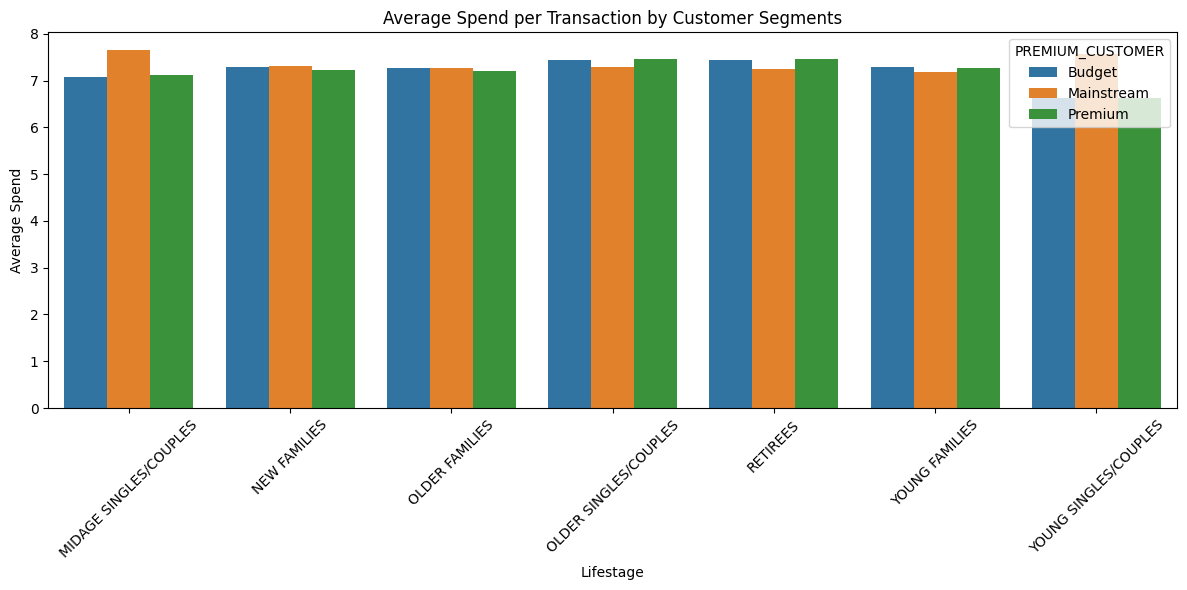

In [20]:
# 2. Average spend per transaction by LIFESTAGE and PREMIUM_CUSTOMER
avg_spend_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    avg_spend=('TOT_SALES', 'mean')
).reset_index()

# Display the result
print(avg_spend_by_segment)

# Bar plot for average spend per transaction by customer segments
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='avg_spend', hue='PREMIUM_CUSTOMER', data=avg_spend_by_segment)
plt.title('Average Spend per Transaction by Customer Segments')
plt.xticks(rotation=45)
plt.ylabel('Average Spend')
plt.xlabel('Lifestage')
plt.tight_layout()
plt.show()


                 LIFESTAGE PREMIUM_CUSTOMER  avg_pack_size
0   MIDAGE SINGLES/COUPLES           Budget     180.187450
1   MIDAGE SINGLES/COUPLES       Mainstream     184.582786
2   MIDAGE SINGLES/COUPLES          Premium     181.577897
3             NEW FAMILIES           Budget     181.161730
4             NEW FAMILIES       Mainstream     181.699355
5             NEW FAMILIES          Premium     181.286973
6           OLDER FAMILIES           Budget     182.487219
7           OLDER FAMILIES       Mainstream     182.175021
8           OLDER FAMILIES          Premium     181.432618
9    OLDER SINGLES/COUPLES           Budget     182.289183
10   OLDER SINGLES/COUPLES       Mainstream     181.642101
11   OLDER SINGLES/COUPLES          Premium     183.254999
12                RETIREES           Budget     182.960200
13                RETIREES       Mainstream     182.289062
14                RETIREES          Premium     182.975260
15          YOUNG FAMILIES           Budget     182.4909

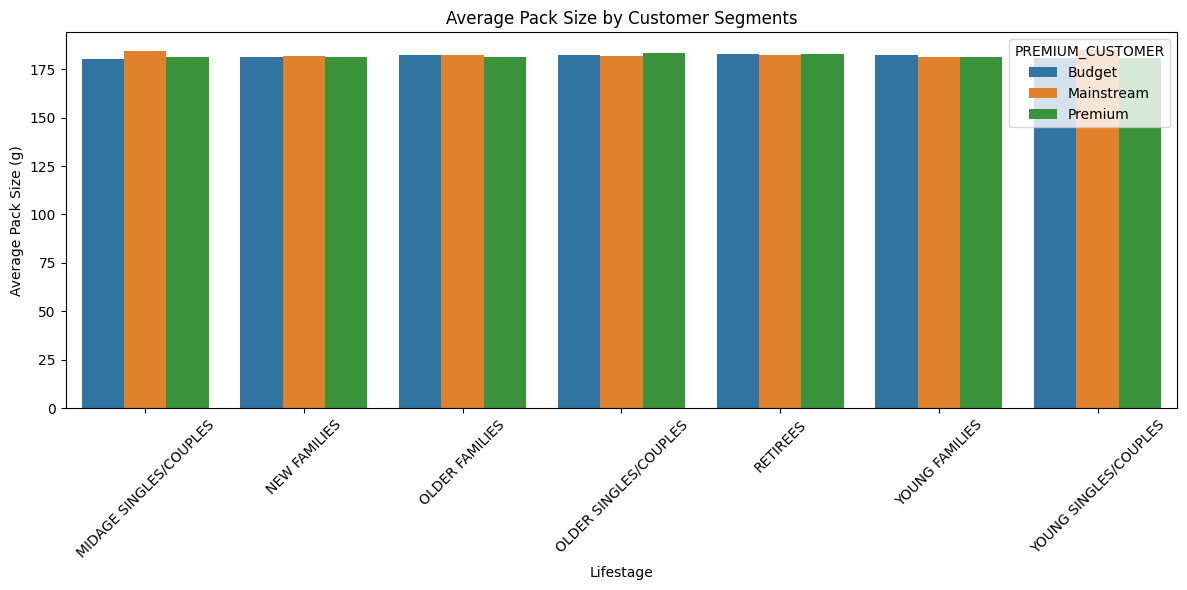

In [21]:
# Average pack size by LIFESTAGE and PREMIUM_CUSTOMER
avg_pack_size_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    avg_pack_size=('PACK_SIZE', 'mean')
).reset_index()

# Display the result
print(avg_pack_size_by_segment)

# Bar plot for average pack size by customer segments
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='avg_pack_size', hue='PREMIUM_CUSTOMER', data=avg_pack_size_by_segment)
plt.title('Average Pack Size by Customer Segments')
plt.xticks(rotation=45)
plt.ylabel('Average Pack Size (g)')
plt.xlabel('Lifestage')
plt.tight_layout()
plt.show()


                 LIFESTAGE PREMIUM_CUSTOMER     BRAND  total_sales
563  YOUNG SINGLES/COUPLES       Mainstream    Kettle      35423.6
186         OLDER FAMILIES           Budget    Kettle      32058.0
389               RETIREES       Mainstream    Kettle      31652.4
273  OLDER SINGLES/COUPLES           Budget    Kettle      29066.4
331  OLDER SINGLES/COUPLES          Premium    Kettle      27943.4
..                     ...              ...       ...          ...
161           NEW FAMILIES          Premium  Pringles       1172.9
165           NEW FAMILIES          Premium    Smiths       1159.9
110           NEW FAMILIES           Budget     Thins       1085.7
131           NEW FAMILIES       Mainstream       Old        805.8
169           NEW FAMILIES          Premium  Tostitos        545.6

[105 rows x 4 columns]


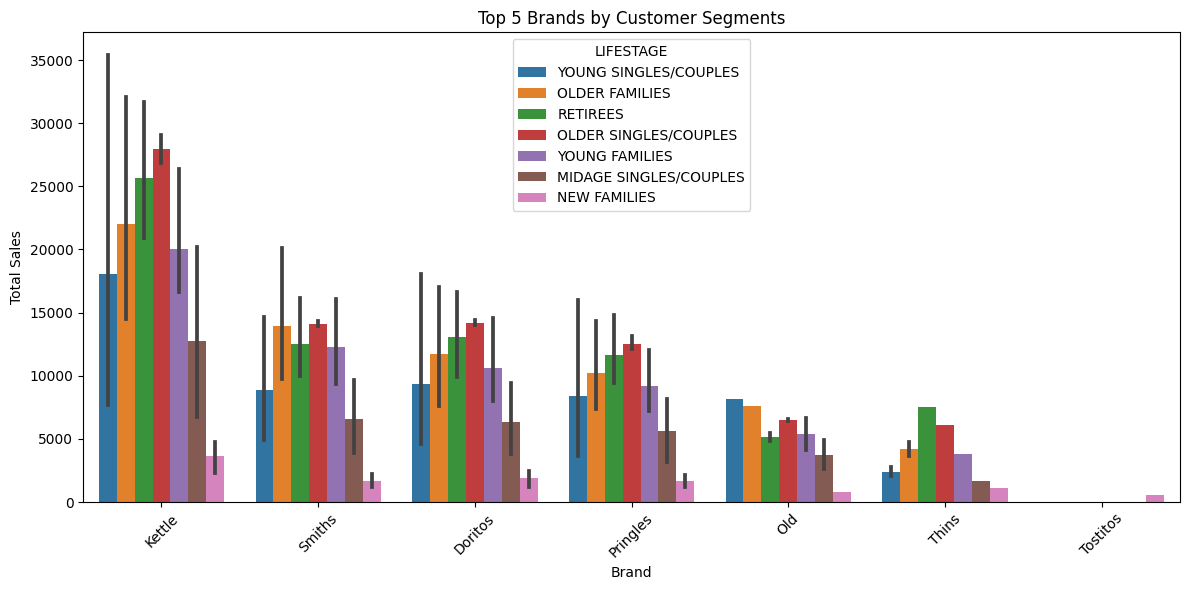

In [22]:
# Calculatng the top 5 most popular brands by sales in each customer segment
top_brands_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND']).agg(
    total_sales=('TOT_SALES', 'sum')
).reset_index()

# Sort by total sales and get top 5 brands per segment
top_brands_by_segment = top_brands_by_segment.sort_values('total_sales', ascending=False).groupby(
    ['LIFESTAGE', 'PREMIUM_CUSTOMER']).head(5)

# Display the result
print(top_brands_by_segment)

# Bar plot for brand preferences by customer segments
plt.figure(figsize=(12, 6))
sns.barplot(x='BRAND', y='total_sales', hue='LIFESTAGE', data=top_brands_by_segment)
plt.title('Top 5 Brands by Customer Segments')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()